# Set working directory and import modules

In [1]:
import os
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('..')
import main
from util.plot_ipd import plot_iterated_prisoners_dilemma, plot_ipd_from_file
from fitness.game_theory_game import PrisonersDilemma
from typing import List, Tuple

# Run Iterated Prisoners Dilemma with two different player strategies

/Users/erikhemberg/mypy37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


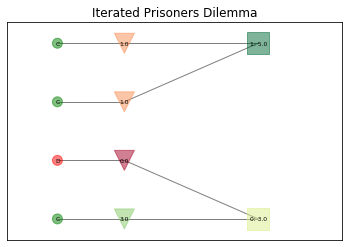

In [2]:
# Strategy for always cooperate
player_1 = lambda h, i: "C"
# Strategy for cooperate if opponent cooperated previous turn
player_2 = lambda h, i: "C" if h[i] == "C" else "D"
n_iterations = 2
memory_size = 1
# Setup a prisoners dilemma engagment
pd = PrisonersDilemma(n_iterations=n_iterations, memory_size=memory_size, store_stats=True, out_file_name=PrisonersDilemma.DEFAULT_OUT_FILE)
# Run the strategies against each other
sentences, histories = pd.run(player_1=player_1, player_2=player_2)
# Plot the choices and the payoffs from the engagement
plot_iterated_prisoners_dilemma(sentences, pd.revise_history(histories), out_path='.')

# Run the heuristic search

In [3]:
# Set to use the configuration file and output directory
args = ["-o", "tmp", "-f", "tests/configurations/iterated_prisoners_dilemma.yml"]
_ = main.main(args)

Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 10, 'elite_size': 1, 'generations': 3, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': "lambda h, i: 'C'", 'n_iterations': 4}, 'output_dir': 'tmp', 'coev': False}
Gen:0 t:0.001 fit_ave:-2.00+-1.581 size_ave:3.50+-0.866 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; -0.0
Gen:1 t:0.001 fit_ave:-1.00+-1.732 size_ave:3.00+-1.000 length_ave:10.50+-0.866 Ind: lambda h, i: "D"; -0.0
Gen:2 t:0.000 fit_ave:0.00+-0.000 size_ave:3.00+-1.000 length_ave:11.50+-0.866 Ind: lambda h, i: "D"; -0.0
Cache entries:7 Total Fitness Evaluations:48 Fitness Values:4
Time: 0.012 Best solution:Ind: lambda h, i: "D"; -0.0


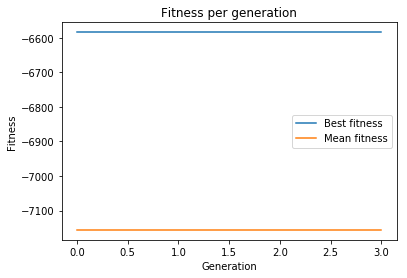

In [4]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness()

# Run the coevlutionary search

In [5]:
args = ["-o", "tmp", "-f", "tests/configurations/coevolution_iterated_prisoners_dilemma.yml", "--coev"]
_ = main.main(args)

Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 100, 'generations': 2, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'elite_size': 1, 'populations': {'attacker': {'adversary': 'defender', 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': 'None', 'n_iterations': 4}}, 'defender': {'adversary': 'attacker', 'bnf_grammar': 'tests/grammars/iterated_prisoners_dilemma.bnf', 'fitness_function': {'name': 'IteratedPrisonersDilemma', 'opponent': 'None', 'n_iterations': 4}}}, 'output_dir': 'tmp', 'coev': True}
attacker 12
Gen:0 t:0.009 fit_ave:-5.56+-0.942 size_ave:4.00+-1.414 length_ave:100.00+-0.000 Ind: lambda h, i: ["D", "C", "D", "D"][i]; -4.5
defender 24
Gen:0 t:0.002 fit_ave:-6.19+-1.451 size_ave:5.00+-1.000 length_ave:100.00+-0.000 Ind: lambda h, i: ["D", "C", "D", "D"][i